<a href="https://colab.research.google.com/github/Pratikmehta1729/walkover/blob/master/Copy_of_word2vecCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training  websites

# **K means clustering through google trained model**

##importing google model

In [0]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-04-21 13:07:24--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  45.7MB/s    in 36s     

2020-04-21 13:08:00 (44.1 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



##Embedding google model

In [0]:
from gensim.models import KeyedVectors
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
modelg= KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
print("loaded model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


loaded model


##Importing CSV File

In [0]:
import pandas as pd
#url = 'https://raw.githubusercontent.com/Nitss10/Walkover/master/top_10.csv'
#url='https://raw.githubusercontent.com/Nitss10/Walkover/master/final_top_100.csv'
url='https://raw.githubusercontent.com/Nitss10/Walkover/master/eng_final_top_100.csv'

df = pd.read_csv(url)

l=[]
titles=[]

x=df.text.tolist()
y=df.title.tolist()
#title_map would give the index for the given url
title_map={}
count=0
for title in y:
  title_map[title]=count
  titles.append(title)
  count+=1

for item in x:
    l.append(item.split())
  
# for testing new url assigning into the cluster
# fit this in the already build k means  

# df = df.head(1000)
# new_url_text=l[2000]
# print(new_url_text)
# new_url_title=titles[2000]
# new_added=sent_vectorizer(new_url_title,modelg)
# kmeans.predict([new_added])

#print(title_map[new_url_title])


##Vectorization of all url's

In [0]:
# Even though using word2vec internally it is using that same process

from gensim.models import Word2Vec
  
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt

sentences = l  

def sent_vectorizer(sent, modelg):
    sent_vec =[]
    numw = 0
    for w in sent: 
        try:
            if numw == 0:
                sent_vec = modelg[w]
            else:
                sent_vec = np.add(sent_vec, modelg[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, modelg))   
  

print ("========================")
print("Vector of each url created")

# print (model.similarity('post', 'book'))
# print (model.most_similar(positive=['machine'], negative=[], topn=2))
 
     
     


Vector of each url created


##Elbow Method

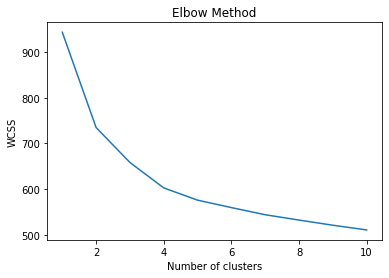

In [0]:


wcss = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



##Clustring of the vectors

In [0]:
print(titles)

['https://www.google.com', 'https://marketingplatform.google.com/about/enterprise/', 'https://m.facebook.com/?refsrc=https%3A%2F%2Fwww.facebook.com%2F&_rdr', 'https://marketingplatform.google.com/about/analytics/', 'https://www.youtube.com/supported_browsers?next_url=%2F', 'https://www.netflix.com/', 'https://www.bing.com:443/?toWww=1&redig=A2A74BC3DFCA4E5FBB12EBAA41DBE2BC', 'https://login.live.com/login.srf?wa=wsignin1.0&rpsnv=13&ct=1587064832&rver=7.0.6737.0&wp=MBI_SSL&wreply=https%3a%2f%2foutlook.live.com%2fowa%2f%3fRpsCsrfState%3de165149d-8faf-52ae-e514-ef2d03e46d81&id=292841&aadredir=1&CBCXT=out&lw=1&fl=dob%2cflname%2cwld&cobrandid=90015', 'https://www.microsoft.com/en-us/', 'https://www.apple.com/', 'https://login.live.com', 'https://accounts.google.com/ServiceLogin?passive=1209600&continue=https%3A%2F%2Faccounts.google.com%2F&followup=https%3A%2F%2Faccounts.google.com%2F', 'https://www.bing.com', 'https://www.skype.com/en/', 'https://play.google.com/store', 'https://www.digicert

In [0]:
NUM_CLUSTERS=10
# kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25,avoid_empty_clusters=True)
# assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
# print(assigned_clusters)

##K means & Plotting clustered vectors

In [0]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

for index, sentence in enumerate(sentences):    
    pass
    #print (str(assigned_clusters[index]) + ":" + str(sentence))


kmeans = cluster.KMeans(NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print(len(centroids[0]))
# print (centroids[0])
# print("**************",X[0])
print(len(centroids))  
#print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
#print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
#print ("Silhouette_score: ")
#print (silhouette_score)
 
 

 
modelg = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=modelg.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
final_dict={}
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   if assigned_clusters[j] not in final_dict:
     final_dict[assigned_clusters[j]]=[]
   final_dict[assigned_clusters[j]].append(titles[j])
   #print ("%s %s" % (assigned_clusters[j],  titles[j]))
for key in final_dict.keys():
  print(final_dict[key])
 
 
plt.show()



[[ 0.05811801 -0.02761574 -0.02578452 ... -0.04045266  0.00226824
  -0.03145449]
 [-0.00256034  0.02549039 -0.00517087 ... -0.0258575   0.02235945
  -0.02080615]
 [ 0.0076858   0.01167576 -0.033661   ... -0.03850295  0.00550577
  -0.00478194]
 ...
 [-0.01007459 -0.00493649  0.00748971 ... -0.05509014 -0.0049263
   0.05566358]
 [ 0.0501579   0.01164733  0.04670857 ... -0.08483472  0.0010594
   0.19166858]
 [ 0.04948277 -0.00882727 -0.03739999 ... -0.06155145 -0.00398586
  -0.01988816]]
Cluster id labels for inputted data
[0 2 0 ... 6 3 0]
Centroids data
300
10


NameError: ignored

##Function to return cluster No for given url 

In [0]:
#currently uses urlVector would change it to url link
new_added=sent_vectorizer(new_url_title,modelg)
print(kmeans.predict([new_added]))
def cluster_number(urlVector):
  import numpy
  index=0
  minDistance = numpy.linalg.norm(centroids[0]-urlVector)
  for i in range(len(centroids)):
    dist = numpy.linalg.norm(centroids[i]-urlVector)
    if(dist<minDistance):
      index=i
      minDistance=dist
  print(index,minDistance)
  print(2,numpy.linalg.norm(centroids[2]-urlVector))
  # print(49,numpy.linalg.norm(centroids[4wikipidea9]-urlVector))
  # return index
clustor_number(X[0])


NameError: ignored

## Fn to return cluster number based on the url

In [0]:
# X stores the VECTOR of the document 
# title_map gives the index of the document 
def get_cluster(title):
  if title in title_map:
    id=title_map[title]
    return get_cluster(id)
  else:
    return "not assigned cluster"

#testing 
get_cluster('https://www.google.com')

'not assigned cluster'

#Using Word2Vec Model

In [0]:
import pandas as pd
#url = 'https://raw.githubusercontent.com/Nitss10/Walkover/master/top_10.csv'
#url='https://raw.githubusercontent.com/Nitss10/Walkover/master/final_top_100.csv'
url='https://raw.githubusercontent.com/Nitss10/Walkover/master/eng_final_top_100.csv'
df = pd.read_csv(url)
l=[]
titles=[]
x=df.text.tolist()
y=df.title.tolist()
for title in y:
  titles.append(title)
for item in x:
    l.append(item.split())
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


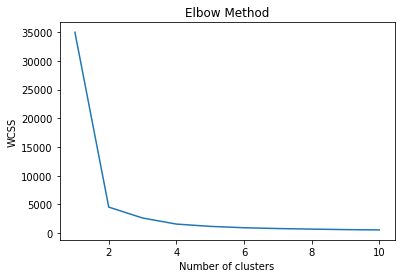

In [0]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import cluster
from sklearn import metrics


sentences = l  
  
 
model = Word2Vec(sentences, min_count=1,size=200)

  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
  
 
print ("========================")


# print (model.similarity('post', 'book'))
# print (model.most_similar(positive=['machine'], negative=[], topn=2))
 
wcss = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
     
     


In [0]:
NUM_CLUSTERS=10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
    
for index, sentence in enumerate(sentences):    
    pass
    #print (str(assigned_clusters[index]) + ":" + str(sentence))

kmeans = cluster.KMeans(NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
#print ("Centroids data")
#print (centroids)
  
#plotting the graph 


 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
final_dict={}
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   if assigned_clusters[j] not in final_dict:
     final_dict[assigned_clusters[j]]=[]
   final_dict[assigned_clusters[j]].append(titles[j])
   #print ("%s %s" % (assigned_clusters[j],  titles[j]))
for key in final_dict.keys():
  print(final_dict[key])
 

plt.show()



KeyboardInterrupt: ignored

#Project Ended

In [0]:
import pandas as pd
import gensim.downloader as api
url = 'https://raw.githubusercontent.com/Pratikmehta1729/walkover/master/top_10.csv'
df = pd.read_csv('final_top_100.csv')
l=[]
titles=[]
x=df.text.tolist()
y=df.title.tolist()
for title in y:
  titles.append(title)
for item in x:
    l.append(item.split())
#print(len(l))
# print(l[0])


# Even though using word2vec internally it is using that same process

from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics
  
# training data
  
# sentences = [['amazon','delivery', 'shipping'],
#             ['social', 'twitter',  'feed'],
#             ['photo', 'feed', 'instagram'],
#             ['shopping', 'delivery', 'flipkart']]
sentences = l  
  
 
model = api.load("word2vec-google-news-300")
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
 
 
  
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])
 
 
  
 
print (model.similarity('post', 'book'))
print (model.most_similar(positive=['machine'], negative=[], topn=2))
  
  
 
  
  
NUM_CLUSTERS=6
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
  
  
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))
 
     
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
 
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 l
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
final_dict={}
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   if assigned_clusters[j] not in final_dict:
     final_dict[assigned_clusters[j]]=[]
   final_dict[assigned_clusters[j]].append(titles[j])
   print ("%s %s" % (assigned_clusters[j],  titles[j]))
for key in final_dict.keys():
  print(final_dict[key])
 
 
plt.show()

FileNotFoundError: ignored

In [0]:
# %config NotebookApp.iopub_data_rate_limit=10000000000
%config 
#  set NotebookApp.iopub_data_rate_limit=10000000000
# print(l)

Available objects for config:
     Shell
     HistoryManager
     PrefilterManager
     IPCompleter
     DisplayFormatter
     MagicsManager
     ScriptMagics
     AliasManager
     IPKernelApp
     InlineBackend
     StoreMagics
     StoreMagics
